### Importing the Required Libraries and Dataset

In [1]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing the data
df = pd.read_csv("spotify.csv")

# Dropping the Unnamed column
df.drop(["Unnamed: 0", "Unnamed: 0.1", "track_number"], axis=1, inplace=True)

#Looking at our dataset
df.head()

,album,artist_name,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms
0,El Dorado,24kGoldn,38mQZ5tZ6IylQaJCCF90ox,The Top,spotify:track:38mQZ5tZ6IylQaJCCF90ox,0.3360,0.754,0.711,0.000,0.128,-3.842,0.0720,138.031,0.2700,True,0.0,59,196373.0
1,Fighting Demons (Deluxe),Juice WRLD,1X8E4vVoOM3BpSQlEDSjjM,Burn,spotify:track:1X8E4vVoOM3BpSQlEDSjjM,0.1490,0.354,0.475,0.034,0.210,-9.333,0.0425,114.975,0.0393,True,0.0,76,217222.0
2,El Dorado,24kGoldn,3JVTsvTldB6arHVlmxmTnM,Company (feat. Future),spotify:track:3JVTsvTldB6arHVlmxmTnM,0.4470,0.831,0.727,0.000,0.111,-3.657,0.1690,125.068,0.7030,True,0.0,71,213080.0
3,Fighting Demons (Deluxe),Juice WRLD,1hB3M3POeKMLxcEFEvPeqU,Already Dead,spotify:track:1hB3M3POeKMLxcEFEvPeqU,0.0216,0.744,0.495,0.000,0.111,-6.311,0.0634,83.510,0.1280,True,1.0,77,231221.0
4,Fighting Demons (Deluxe),Juice WRLD,1CfuBY3BDdKpooQ9L5zgUc,Cigarettes,spotify:track:1CfuBY3BDdKpooQ9L5zgUc,0.0306,0.587,0.614,0.000,0.399,-6.344,0.0435,160.075,0.4510,True,1.0,79,227527.0


In [3]:
# Rows X Columns
print("No. of songs (rows) in the DataFrame: " + str(len(df)))
print("No. of columns in the DataFrame: " + str(df.shape[1]))

No. of songs (rows) in the DataFrame: 16113
No. of columns in the DataFrame: 18


In [4]:
# information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16113 entries, 0 to 16112
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album             16113 non-null  object 
 1   artist_name       16113 non-null  object 
 2   id                16113 non-null  object 
 3   name              16113 non-null  object 
 4   uri               16113 non-null  object 
 5   acousticness      16113 non-null  float64
 6   danceability      16113 non-null  float64
 7   energy            16113 non-null  float64
 8   instrumentalness  16113 non-null  float64
 9   liveness          16113 non-null  float64
 10  loudness          16113 non-null  float64
 11  speechiness       16113 non-null  float64
 12  tempo             16113 non-null  float64
 13  valence           16113 non-null  float64
 14  explicit          15078 non-null  object 
 15  mode              15078 non-null  float64
 16  popularity        16113 non-null  int64 

Missing values are there in the columns: "duration_ms", "explicit", and "mode".

In [5]:
# statistical distribution of the data
df.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,popularity,duration_ms
count,16113.000000,16113.000000,16113.000000,16113.000000,16113.00000,16113.000000,16113.000000,16113.000000,16113.000000,15078.000000,16113.000000,1.507800e+04
mean,0.247861,0.577129,0.642099,0.083234,0.26324,-7.800583,0.109103,121.468911,0.456556,0.646372,38.781977,2.194204e+05
std,0.298221,0.165858,0.230437,0.228557,0.24515,4.334493,0.137895,28.794258,0.237142,0.478111,22.687283,1.012871e+05
min,0.000001,0.000000,0.000261,0.000000,0.00000,-43.433000,0.000000,0.000000,0.000000,0.000000,0.000000,4.812000e+03
25%,0.014700,0.466000,0.485000,0.000000,0.10300,-9.215000,0.038000,99.930000,0.272000,0.000000,21.000000,1.780880e+05
50%,0.102000,0.589000,0.674000,0.000009,0.15200,-6.690000,0.055500,123.210000,0.435000,1.000000,40.000000,2.122690e+05
75%,0.405000,0.697000,0.832000,0.002830,0.33000,-4.980000,0.111000,138.949000,0.634000,1.000000,56.000000,2.492330e+05
max,0.996000,0.983000,0.999000,0.995000,1.00000,-0.140000,0.963000,220.065000,0.982000,1.000000,97.000000,4.796396e+06


In [7]:
# unique values
print("UNIQUE VALUES:")
print(df.nunique().sort_values())

UNIQUE VALUES:
mode                    2
explicit                2
popularity             98
artist_name           187
danceability          861
energy               1097
album                1201
valence              1327
speechiness          1358
liveness             1550
acousticness         3416
instrumentalness     3935
loudness             8762
duration_ms         11965
tempo               12840
name                16100
uri                 16113
id                  16113
dtype: int64


Categorical Features:

In [8]:
# statistical distribution of categorical values
df.describe(include="O")

,album,artist_name,id,name,uri,explicit
count,16113,16113,16113,16113,16113,15078
unique,1201,187,16113,16100,16113,2
top,Balance (Remixes),The Beach Boys,38mQZ5tZ6IylQaJCCF90ox,All Comes Down,spotify:track:38mQZ5tZ6IylQaJCCF90ox,False
freq,87,687,1,2,1,11535


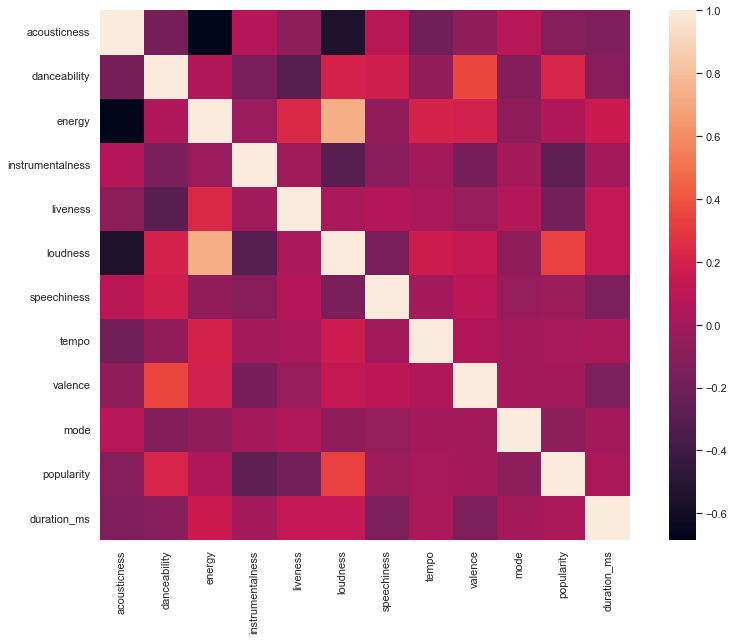

In [10]:
# creating a correlation matrix
corr = df.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

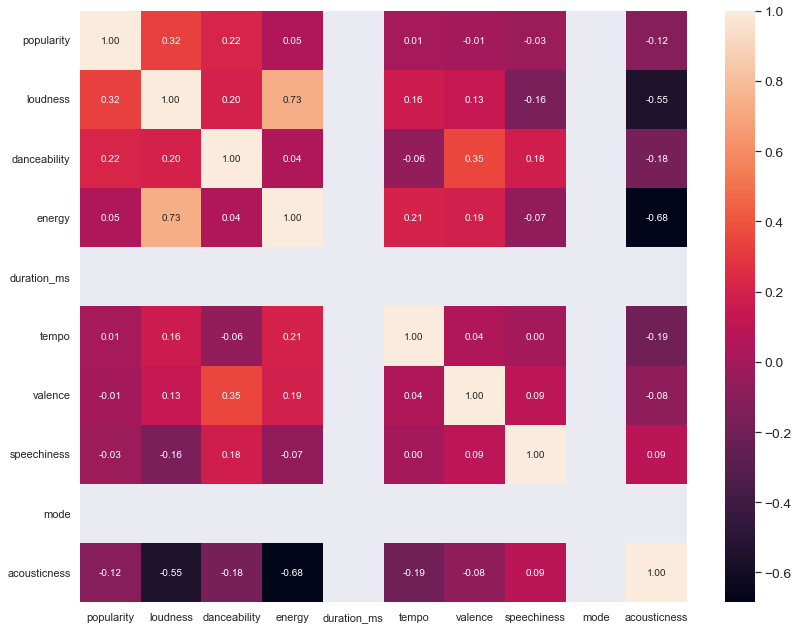

In [11]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

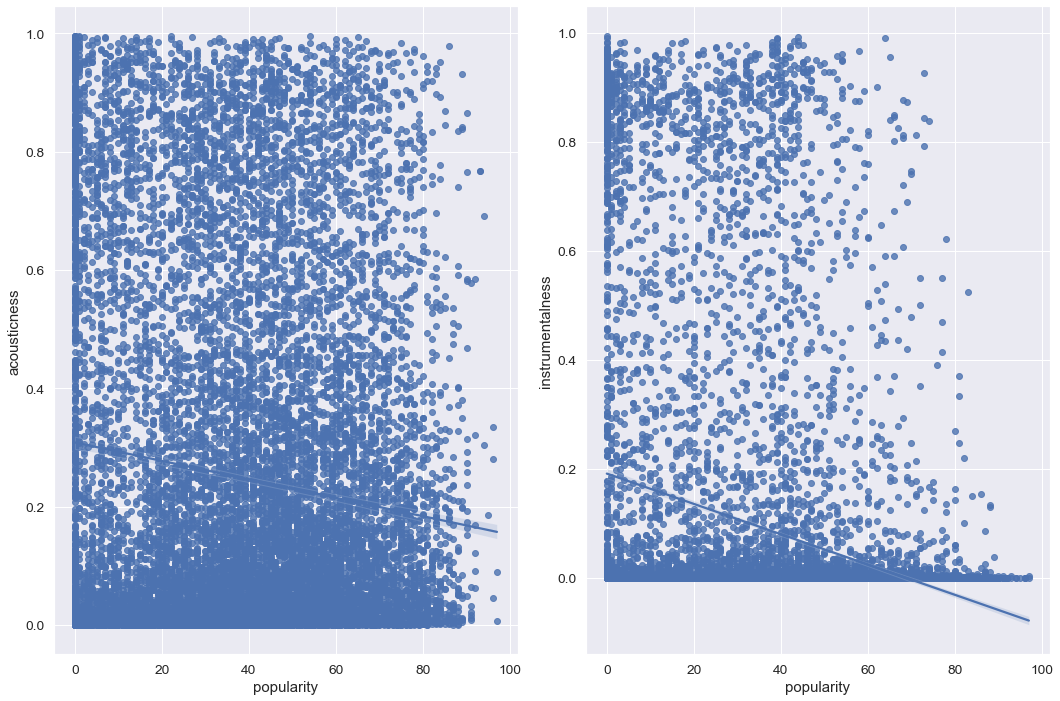

In [12]:
# scatter plots with linear regression line
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=df['popularity'], y=df['acousticness'], ax=ax1);
sns.regplot(x=df['popularity'], y=df['instrumentalness'], ax=ax2);
plt.tight_layout()

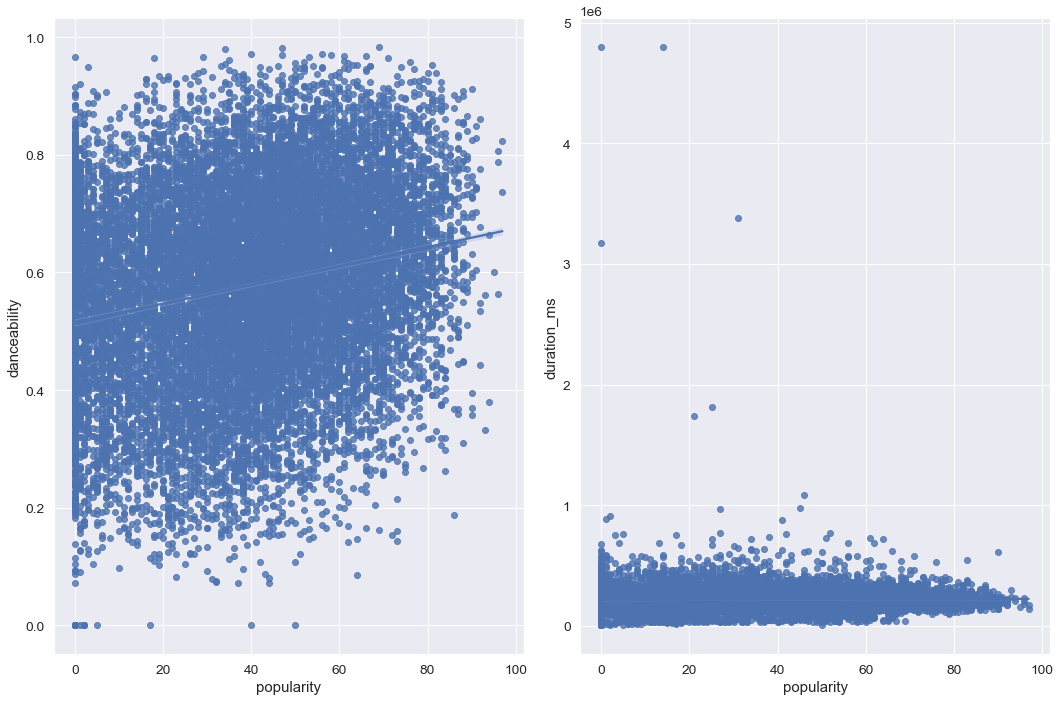

In [14]:
# scatter plot with linear regression line
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=df['popularity'], y=df['danceability'], ax=ax1)
sns.regplot(x=df['popularity'], y=df['duration_ms'], ax=ax2)
plt.tight_layout()

In [15]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [20]:
# creating a copy of the dataset
df_cluster = df.copy()
df_cluster = df_cluster.iloc[:6000]

In [21]:
# creating a dataframe without the categorical features
X = df_cluster.iloc[:, [6,7,8,9,10,11,12,13,14,16,17]].values

In [22]:
print(X.shape)
df_cluster.head()

(6000, 11)


,album,artist_name,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms
0,El Dorado,24kGoldn,38mQZ5tZ6IylQaJCCF90ox,The Top,spotify:track:38mQZ5tZ6IylQaJCCF90ox,0.3360,0.754,0.711,0.000,0.128,-3.842,0.0720,138.031,0.2700,True,0.0,59,196373.0
1,Fighting Demons (Deluxe),Juice WRLD,1X8E4vVoOM3BpSQlEDSjjM,Burn,spotify:track:1X8E4vVoOM3BpSQlEDSjjM,0.1490,0.354,0.475,0.034,0.210,-9.333,0.0425,114.975,0.0393,True,0.0,76,217222.0
2,El Dorado,24kGoldn,3JVTsvTldB6arHVlmxmTnM,Company (feat. Future),spotify:track:3JVTsvTldB6arHVlmxmTnM,0.4470,0.831,0.727,0.000,0.111,-3.657,0.1690,125.068,0.7030,True,0.0,71,213080.0
3,Fighting Demons (Deluxe),Juice WRLD,1hB3M3POeKMLxcEFEvPeqU,Already Dead,spotify:track:1hB3M3POeKMLxcEFEvPeqU,0.0216,0.744,0.495,0.000,0.111,-6.311,0.0634,83.510,0.1280,True,1.0,77,231221.0
4,Fighting Demons (Deluxe),Juice WRLD,1CfuBY3BDdKpooQ9L5zgUc,Cigarettes,spotify:track:1CfuBY3BDdKpooQ9L5zgUc,0.0306,0.587,0.614,0.000,0.399,-6.344,0.0435,160.075,0.4510,True,1.0,79,227527.0


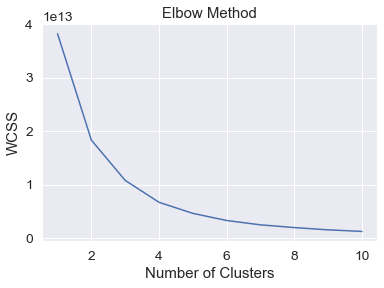

In [23]:
# finding out the proper number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [24]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [25]:
scaled = scaler.fit_transform(X)

In [26]:
# instantiating model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

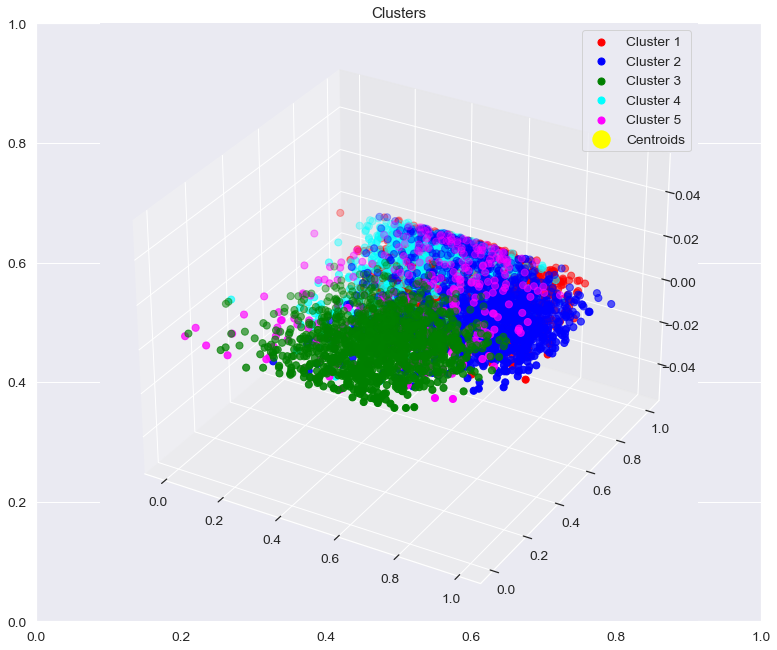

In [27]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [28]:
# predictions 
y_kmeans

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

(6000, 1)


,k_cluster
0,1
1,1
2,1
3,1
4,1


In [30]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(6000, 19)


,album,artist_name,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms,k_cluster
0,El Dorado,24kGoldn,38mQZ5tZ6IylQaJCCF90ox,The Top,spotify:track:38mQZ5tZ6IylQaJCCF90ox,0.3360,0.754,0.711,0.000,0.128,-3.842,0.0720,138.031,0.2700,True,0.0,59,196373.0,1
1,Fighting Demons (Deluxe),Juice WRLD,1X8E4vVoOM3BpSQlEDSjjM,Burn,spotify:track:1X8E4vVoOM3BpSQlEDSjjM,0.1490,0.354,0.475,0.034,0.210,-9.333,0.0425,114.975,0.0393,True,0.0,76,217222.0,1
2,El Dorado,24kGoldn,3JVTsvTldB6arHVlmxmTnM,Company (feat. Future),spotify:track:3JVTsvTldB6arHVlmxmTnM,0.4470,0.831,0.727,0.000,0.111,-3.657,0.1690,125.068,0.7030,True,0.0,71,213080.0,1
3,Fighting Demons (Deluxe),Juice WRLD,1hB3M3POeKMLxcEFEvPeqU,Already Dead,spotify:track:1hB3M3POeKMLxcEFEvPeqU,0.0216,0.744,0.495,0.000,0.111,-6.311,0.0634,83.510,0.1280,True,1.0,77,231221.0,1
4,Fighting Demons (Deluxe),Juice WRLD,1CfuBY3BDdKpooQ9L5zgUc,Cigarettes,spotify:track:1CfuBY3BDdKpooQ9L5zgUc,0.0306,0.587,0.614,0.000,0.399,-6.344,0.0435,160.075,0.4510,True,1.0,79,227527.0,1


In [31]:
# checking for null
(df_cluster.isnull().sum()/ df_cluster.shape[0]).sort_values(ascending=False)

album               0.0
loudness            0.0
duration_ms         0.0
popularity          0.0
mode                0.0
explicit            0.0
valence             0.0
tempo               0.0
speechiness         0.0
liveness            0.0
artist_name         0.0
instrumentalness    0.0
energy              0.0
danceability        0.0
acousticness        0.0
uri                 0.0
name                0.0
id                  0.0
k_cluster           0.0
dtype: float64

In [32]:
# popularity mean by cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
1    57.020393
0    46.844041
2    28.947536
4    25.524590
3    24.129913
Name: popularity, dtype: float64

In [33]:
# checking number of songs in each cluster
df_cluster['k_cluster'].value_counts()

0    2148
1    1373
2    1258
3     916
4     305
Name: k_cluster, dtype: int64

In [34]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 4][:10]

,album,artist_name,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,explicit,mode,popularity,duration_ms,k_cluster
83,Legends Never Die,Juice WRLD,2wg81gBz6PZSwbZrXObeW4,Get Through It - Interlude,spotify:track:2wg81gBz6PZSwbZrXObeW4,0.918000,0.3480,0.231,0.857,0.159,-16.230,0.0450,89.098,0.2000,True,1.0,16,20929.0,4
290,BADLANDS (Live From Webster Hall),Halsey,4hLGqLXIGSsVoR3Sfl8LdW,Colors pt. II - Live From Webster Hall,spotify:track:4hLGqLXIGSsVoR3Sfl8LdW,0.008270,0.4760,0.601,0.544,0.470,-9.085,0.0546,95.165,0.3210,False,1.0,33,104250.0,4
367,Japan Calling,Aerosmith,6mW6lCoORePaFv4n2LnX7Q,Intro (The Ride Of The Valkyries),spotify:track:6mW6lCoORePaFv4n2LnX7Q,0.196000,0.0787,0.606,0.904,0.904,-15.459,0.1330,177.985,0.0706,False,1.0,31,206838.0,4
368,Japan Calling,Aerosmith,7vznytaafMlUOFANEKzcBV,Draw The Line,spotify:track:7vznytaafMlUOFANEKzcBV,0.000131,0.3480,0.936,0.649,0.348,-7.625,0.1250,136.152,0.1190,False,1.0,30,297845.0,4
372,Japan Calling,Aerosmith,16ZD0KYhy4EZahmptifCL2,Drum Solo,spotify:track:16ZD0KYhy4EZahmptifCL2,0.000031,0.3130,0.941,0.793,0.731,-11.146,0.0594,128.625,0.0968,False,1.0,22,344597.0,4
387,Japan Calling,Aerosmith,5heBepXshPPypsCo5UDl5u,Train Kept A Rollin',spotify:track:5heBepXshPPypsCo5UDl5u,0.000009,0.3090,0.806,0.573,0.556,-6.087,0.0482,91.029,0.0669,False,1.0,17,253333.0,4
388,BADLANDS (Deluxe),Halsey,2FBkPf8hS5Jam6YEnV8DBF,Colors pt. II,spotify:track:2FBkPf8hS5Jam6YEnV8DBF,0.017900,0.5850,0.634,0.633,0.146,-8.364,0.0507,94.969,0.4530,False,1.0,53,96476.0,4
418,ライヴ・アット・ウッドストック・フェスティヴァル1994 (Live),Aerosmith,0jgz9upW6H36rIdVIC8bsv,バンド・イントロダクション>アウトロ,spotify:track:0jgz9upW6H36rIdVIC8bsv,0.028800,0.2720,0.875,0.833,0.828,-14.186,0.3080,115.526,0.0378,False,1.0,4,209787.0,4
432,ライヴ1975/1980 ~キング・ビスケット・フラワー・アワー~ (Live) [Rema...,Aerosmith,2sOBZldWpvUzon3WI2XUYk,"スリー・マイル・スマイル (Stage West, Hartford Connecticut...",spotify:track:2sOBZldWpvUzon3WI2XUYk,0.021200,0.2560,0.781,0.410,0.396,-8.327,0.0815,108.822,0.6020,False,1.0,1,242493.0,4
435,ライヴ1975/1980 ~キング・ビスケット・フラワー・アワー~ (Live) [Rema...,Aerosmith,3W104JkagYyi6ayulPIBv1,"リック・アンド・ア・プロミス (Stage West, Hartford Connectic...",spotify:track:3W104JkagYyi6ayulPIBv1,0.096900,0.2680,0.847,0.778,0.704,-9.189,0.0991,155.339,0.4290,False,0.0,1,216800.0,4


In [35]:
# statistical distribution of the data in each column, for each cluster
df_cluster.groupby("k_cluster").describe() 

acousticness                                                   \
                 count      mean       std       min       25%      50%   
k_cluster                                                                 
0               2148.0  0.135999  0.189557  0.000007  0.008180  0.04840   
1               1373.0  0.187103  0.236997  0.000002  0.016500  0.08720   
2               1258.0  0.513457  0.324180  0.000051  0.184750  0.57200   
3                916.0  0.153599  0.222457  0.000005  0.005298  0.04655   
4                305.0  0.272864  0.327275  0.000002  0.006980  0.10200   

                          danceability                                      \
               75%    max        count      mean       std    min      25%   
k_cluster                                                                    
0          0.18600  0.900       2148.0  0.590820  0.140340  0.000  0.49900   
1          0.25500  0.991       1373.0  0.654905  0.170856  0.118  0.54300   
2          0.81775  0.993       1258.0  0.504561  0.137253  0.000  0.41825   
3          0.21025  0.950        916.0  0.418769  0.140022  0.000  0.31675   
4          0.50400  0.994        305.0  0.482317  0.183288  0.000  0.35700   

                                   energy                              \
              50%      75%    max   count      mean       std     min   
k_cluster                                                               
0          0.5965  0.69225  0.968  2148.0  0.737844  0.147637  0.3000   
1          0.6770  0.78000  0.983  1373.0  0.648168  0.185301  0.0674   
2          0.5090  0.60000  0.861  1258.0  0.334363  0.149849  0.0107   
3          0.4110  0.51700  0.847   916.0  0.780283  0.184363  0.0964   
4          0.4920  0.61700  0.856   305.0  0.605624  0.265546  0.0424   

                                           instrumentalness            \
               25%     50%      75%    max            count      mean   
k_cluster                                                               
0          0.62575  0.7410  0.85900  0.996           2148.0  0.012604   
1          0.51900  0.6470  0.78100  0.996           1373.0  0.013578   
2          0.22525  0.3365  0.44175  0.805           1258.0  0.019334   
3          0.68300  0.8410  0.92900  0.999            916.0  0.031953   
4          0.38900  0.6190  0.83800  0.995            305.0  0.745066   

                                                                liveness  \
                std    min       25%       50%       75%    max    count   
k_cluster                                                                  
0          0.049352  0.000  0.000000  0.000006  0.000523  0.460   2148.0   
1          0.079104  0.000  0.000000  0.000000  0.000076  0.888   1373.0   
2          0.065699  0.000  0.000000  0.000017  0.001267  0.547   1258.0   
3          0.098152  0.000  0.000001  0.000164  0.006985  0.712    916.0   
4          0.161215  0.334  0.623000  0.790000  0.877000  0.977    305.0   

                                                                       \
               mean       std     min     25%     50%      75%    max   
k_cluster                                                               
0          0.176110  0.116172  0.0200  0.0931  0.1280  0.24025  0.674   
1          0.254325  0.237538  0.0241  0.1060  0.1430  0.30900  0.992   
2          0.201034  0.146382  0.0000  0.1030  0.1360  0.26975  0.965   
3          0.819159  0.159849  0.3150  0.6990  0.8685  0.96000  1.000   
4          0.278915  0.263784  0.0000  0.1030  0.1460  0.36000  0.995   

          loudness                                                           \
             count       mean       std     min       25%      50%      75%   
k_cluster                                                                     
0           2148.0  -6.001547  2.131875 -15.344  -7.09150  -5.7395 -4.49975   
1           1373.0  -6.671345  2.684030 -25.166  -7.88000  -6.2260 -4.89500   
2           1258.0 -12.58